# WeatherPy

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
               
# Print the city count to confirm sufficient count
len(cities)

569

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# OpenWeatherMap API Key
api_key = api_key

# OpenWeatherMap URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Initialize data frame to store data from API calls
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

In [22]:
#Creates a for loop that loops through cities and pulls requested information from API

record = 1
index = 0

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

for city in cities:
    try:
        new_city = city.replace(" ", "%20")
        response = requests.get(f"{url}{new_city}&units=imperial&appid={api_key}").json()
        
        WeatherPy_df.loc[index] = [response["name"], response["clouds"]["all"], response["sys"]["country"],
                                 response["dt"], response["main"]["temp_max"], response["wind"]["speed"],
                                 response["coord"]["lat"], response["coord"]["lon"], response["main"]["humidity"]]
        index += 1
        print(f"Processing Record {record} | {city}")
        
        record += 1
        
        time.sleep(1.01)
    
    except:
        print(f"City not found. Skipping...")
    
    continue

print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 | gidole
Processing Record 2 | geraldton
Processing Record 3 | rikitea
Processing Record 4 | ushuaia
Processing Record 5 | moroni
Processing Record 6 | puerto madryn
Processing Record 7 | airai
Processing Record 8 | ruidoso
City not found. Skipping...
Processing Record 9 | darhan
Processing Record 10 | arraial do cabo
Processing Record 11 | ribeira grande
Processing Record 12 | mao
Processing Record 13 | ubinskoye
Processing Record 14 | khandyga
Processing Record 15 | mar del plata
City not found. Skipping...
Processing Record 16 | dunedin
Processing Record 17 | qaanaaq
Processing Record 18 | chalmette
Processing Record 19 | tuktoyaktuk
Processing Record 20 | alofi
Processing Record 21 | iqaluit
Processing Record 22 | jardim
City not found. Skipping...
Processing Record 23 | jamestown
Processing Record 24 | punta arenas
Processing Record 25 | carnarvon
Processing Record 26 | torbay
Processing Record 27 | morehea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
#Export dataframe into CSV
export_csv = WeatherPy_df.to_csv(r"weather_data.csv", index=None, header=True)

#Display WeatherPy_df
WeatherPy_df.head()

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Gidole,75,ET,1571195244,63.05,1.39,5.65,37.37,87
1,Geraldton,90,CA,1571195245,41.00,5.82,49.72,-86.95,86
2,Rikitea,67,PF,1571195246,74.57,6.51,-23.12,-134.97,88
3,Ushuaia,3,AR,1571195247,41.00,5.82,-54.81,-68.31,93
4,Moroni,20,GR,1571195248,64.00,6.93,35.09,24.92,88


In [24]:
#Count weather data values
weather_count = WeatherPy_df.count()
weather_count

City          510
Cloudiness    510
Country       510
Date          510
Max Temp      510
Wind Speed    510
Lat           510
Lng           510
Humidity      510
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

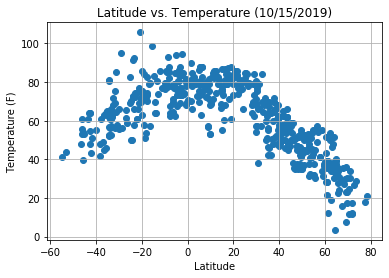

In [25]:
#Import datetime to get date of analysis
import datetime
d = datetime.datetime.today()
new_d = d.strftime('%m/%d/%Y')

#Create scatter plot
plt.scatter(WeatherPy_df["Lat"],WeatherPy_df["Max Temp"])

#Add title and axes labels
plt.title(f"Latitude vs. Temperature ({new_d})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

# Save the Figure
plt.savefig("LatVSTemp.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

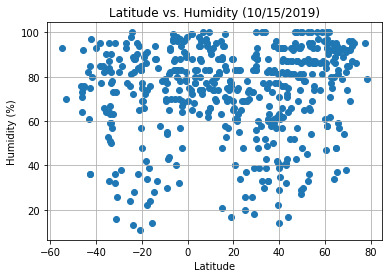

In [26]:
#Create scatter plot
plt.scatter(WeatherPy_df["Lat"],WeatherPy_df["Humidity"])

#Add title and axes labels
plt.title(f"Latitude vs. Humidity ({new_d})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the Figure
plt.savefig("LatVSHumid.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

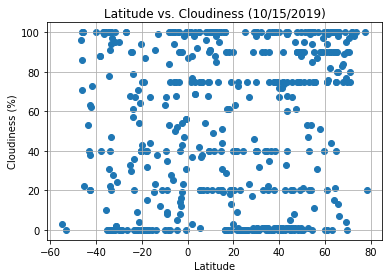

In [27]:
#Create scatter plot
plt.scatter(WeatherPy_df["Lat"],WeatherPy_df["Cloudiness"])

#Add title and axes labels
plt.title(f"Latitude vs. Cloudiness ({new_d})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the Figure
plt.savefig("LatVSCloud.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

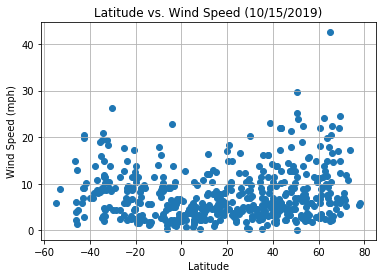

In [28]:
#Create scatter plot
plt.scatter(WeatherPy_df["Lat"],WeatherPy_df["Wind Speed"])

#Add title and axes labels
plt.title(f"Latitude vs. Wind Speed ({new_d})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the Figure
plt.savefig("LatVSWind.png")

# Show the Figure
plt.show()

In [29]:
# Observable Trends:
# 1. The Latitude VS. Temperature scatter plot shows that the closer the city is to the equator
# (where the latitude is zero), the higher the maximum temperature is.
# 2. Based on the Latitude VS. Humidity scatter plot, there appears to be no correlation between
# latitude and humidity. The latitude does not determine whether the humidity percentage is higher 
# or lower for a city.
# 3. Latitude and Wind Speed have a stronger relationship. It seems to be constant that regardless of
# latitude, the cities tend to have a lower wind speed (in mph).